In [1]:
from bilinear_interpolation import *
from PIL import Image
from IPython.display import display

# Testing bilinear interpolation

Original image


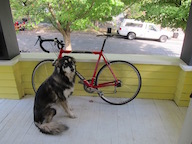

Original image stretched to full size


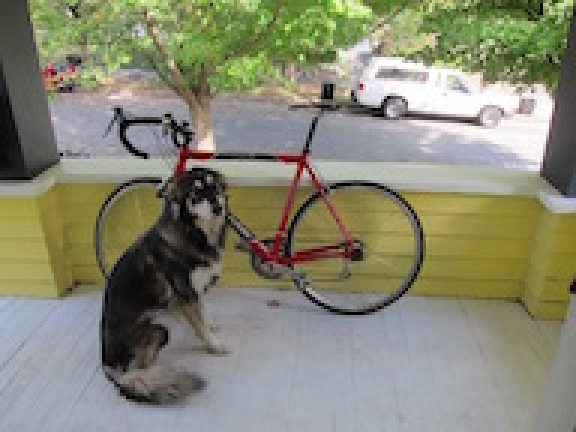

Original image with bilinear interpolation


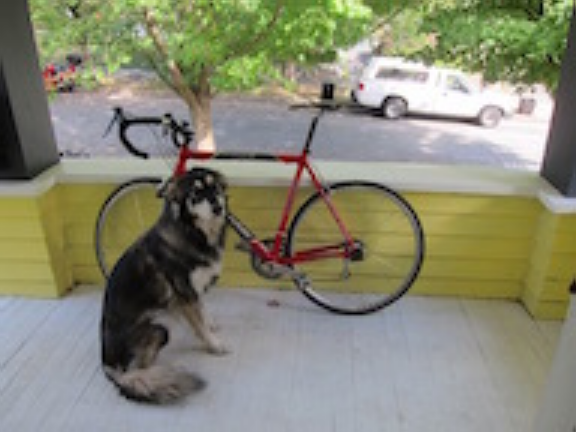

In [7]:
im = Image.open('dogsmall.jpg')
width, height = int(im.width*3), int(im.height*3)
stretched_im = im.resize((im.width * 3, im.height * 3), resample=Image.NEAREST)

print('Original image')
display(im)
print('Original image stretched to full size')
display(stretched_im)
print('Original image with bilinear interpolation')
display(imresize_bi(im, width, height))

